In [36]:
import numpy as np
import matplotlib.pyplot as plt

In [37]:
exp_data=np.loadtxt('Calib_thermometer.txt')
theta=exp_data[:,0]
cc=exp_data[:,1]
nb=len(cc)

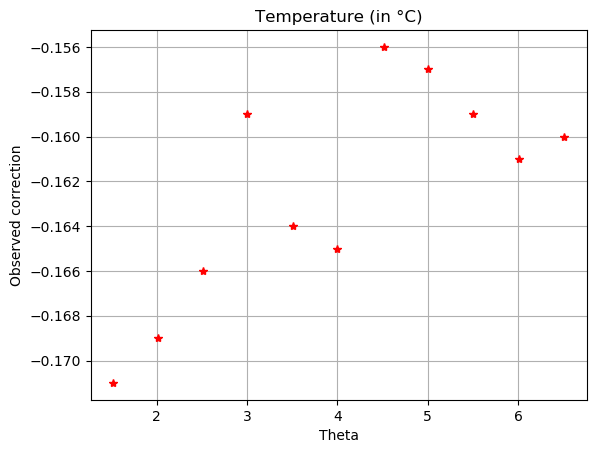

In [38]:
plt.plot(theta,cc,'* r')
plt.xlabel("Theta")
plt.ylabel("Observed correction")
plt.grid()
plt.savefig("disp.jpg")
plt.title("Temperature (in °C)")
plt.show()

In [39]:
c_t=sum(cc*theta)
c=sum(cc)
theta_s=sum(theta**2)
theta_1=sum(theta)
N=len(theta)

In [40]:
a=(c_t*N-c*theta_1)/(N*theta_s-(theta_1)**2)
b=(c*theta_s-c_t*theta_1)/(N*theta_s-(theta_1)**2)
print(a,b)

0.0021826977398872924 -0.17120379013135012


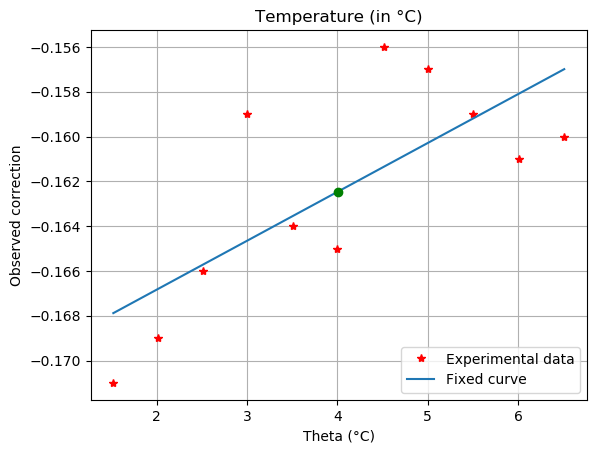

In [41]:
plt.plot(theta,cc,'* r')
plt.plot(theta,a*theta+b)
plt.plot(theta_1/len(theta),c/len(theta),'o g')
plt.xlabel("Theta (°C)")
plt.ylabel("Observed correction")
plt.grid()
plt.title("Temperature (in °C)")
plt.legend(['Experimental data','Fixed curve'],loc='lower right')
plt.savefig("disp.jpg")
plt.show()

In [42]:
mean_th=theta_1/len(theta)
mean_c=c/len(theta)

In [43]:
N= len(cc)
D=N*sum(theta**2)-sum(theta)**2
a=(N*sum(theta*cc)-sum(theta)*sum(cc))/(N*sum(theta**2)-sum(theta)**2)
b=(sum(theta**2)*sum(cc)-sum(theta)*sum(theta*cc))/(N*sum(theta**2)-sum(theta)**2)
c=a*theta+b
thetaBar=sum(theta)/N
cBar=sum(cc)/N

In [44]:
print("a =",a)
print("b =",b)

s2=(1/(N-2))*sum((cc-c)**2)
s=np.sqrt(s2)
print("s =",s)

a = 0.0021826977398872924
b = -0.17120379013135012
s = 0.003497563963505289


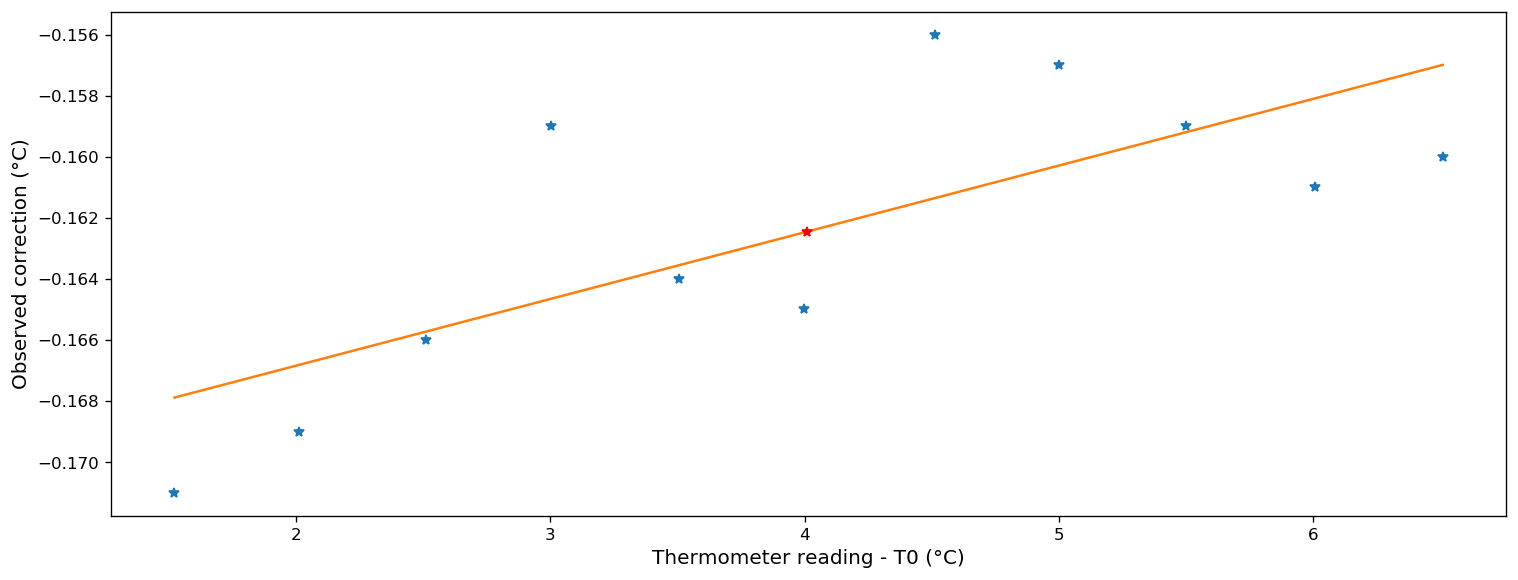

In [45]:
### Plot

font = 12

ax= plt.figure(1,figsize=(15,12),dpi=120)
plt.clf()
ax1=plt.subplot(211)
ax1.plot(theta,cc,'*')
ax1.set_ylabel('Observed correction (°C)',fontsize=font)
ax1.set_xlabel('Thermometer reading - T0 (°C)',fontsize=font)

ax1.plot(theta,c)
ax1.plot(thetaBar,cBar, 'r*')
plt.show()

In [46]:
### Matrix form
print('\nMatrix From\n')
X=np.c_[theta,np.ones(N)]
nbparan=len(X.T)
Hessian=np.linalg.inv(np.dot(X.T,X))
beta=np.dot(Hessian,np.dot(X.T,cc))
print('Beta = ',beta,'\n')

ss=np.sqrt(sum((cc-(a*theta+b))**2)/(N-2))
cov_eB=Hessian*ss**2
print(cov_eB)

Sa2=N*(s2/D)
Sb2=N*(s2/D)*sum(theta**2)
Sa=np.sqrt(Sa2)
Sb=np.sqrt(Sb2)

print("Sa =",Sa)
print("Sb =",Sb)

print("a =",beta[0],'+-',1.96*Sa)
print("b =",beta[1],'+-',1.96*Sb)


Matrix From

Beta =  [ 0.0021827  -0.17120379] 

[[ 4.46142205e-07 -1.78834075e-06]
 [-1.78834075e-06  8.28056930e-06]]
Sa = 0.0006679387732278329
Sb = 0.00954391231676455
a = 0.0021826977398872183 +- 0.0013091599955265523
b = -0.17120379013135012 +- 0.01870606814085852


In [47]:
ax2=plt.subplot(212)
ax2.plot(theta,cc-(a*theta+b),'*')
ax2.plot(theta,np.zeros(N),'k--',linewidth=1)
ax2.bar(theta[0],[-ss,ss],width=theta[N-1]-theta[0],align='edge',color='silver')

<BarContainer object of 2 artists>

-0.9304296030934459


/srv/conda/envs/notebook/lib/python3.7/site-packages/ipykernel_launcher.py:1: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  """Entry point for launching an IPython kernel.


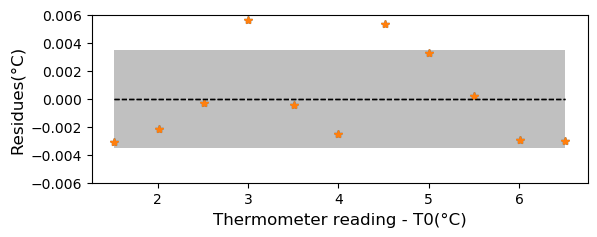

In [48]:
ax2=plt.subplot(212)
ax2.plot(theta,cc-(a*theta+b),'*')
ax2.plot(theta,np.zeros(N),'k--',linewidth=1)
ax2.bar(theta[0],[-ss,ss],width=theta[N-1]-theta[0],align='edge',color='silver')

#ax2.plot(theta,s)
font = 12
ax2.set_ylabel('Residues(°C)',fontsize=font)
ax2.set_xlabel('Thermometer reading - T0(°C)',fontsize=font)
ax2.set_ylim(-0.006,0.006)

r=-sum(theta)/np.sqrt(N*sum(theta**2))
print(r)
plt.show()